<a href="https://colab.research.google.com/github/gustavoramos82/analise-e-modelagem-das-a-es-magalu/blob/main/Modelagem_A%C3%A7%C3%B5es_Magalu_Arima_(Arima_e_Sarima).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pandas_datareader import data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
import yfinance as yfin

yfin.pdr_override()
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

from itertools import product
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
magalu = data.DataReader("MGLU3.SA",start='2018-01-2', end='2023-01-23')
magalu

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02 00:00:00-02:00,2.528125,2.574375,2.450312,2.478125,2.390916,59427200
2018-01-03 00:00:00-02:00,2.468750,2.542500,2.422500,2.446875,2.360766,41385600
2018-01-04 00:00:00-02:00,2.500000,2.516250,2.478125,2.505625,2.417448,47936000
2018-01-05 00:00:00-02:00,2.514062,2.528437,2.448437,2.456250,2.369811,30684800
2018-01-08 00:00:00-02:00,2.453125,2.503437,2.448437,2.456562,2.370112,28796800
...,...,...,...,...,...,...
2023-01-16 00:00:00-03:00,3.380000,3.960000,3.370000,3.850000,3.850000,223987500
2023-01-17 00:00:00-03:00,3.900000,4.020000,3.660000,3.790000,3.790000,253024500
2023-01-18 00:00:00-03:00,3.840000,3.880000,3.520000,3.560000,3.560000,227221500


In [6]:
magalu = magalu['Close']
magalu

Date
2018-01-02 00:00:00-02:00    2.478125
2018-01-03 00:00:00-02:00    2.446875
2018-01-04 00:00:00-02:00    2.505625
2018-01-05 00:00:00-02:00    2.456250
2018-01-08 00:00:00-02:00    2.456562
                               ...   
2023-01-16 00:00:00-03:00    3.850000
2023-01-17 00:00:00-03:00    3.790000
2023-01-18 00:00:00-03:00    3.560000
2023-01-19 00:00:00-03:00    3.810000
2023-01-20 00:00:00-03:00    3.820000
Name: Close, Length: 1254, dtype: float64

In [7]:
treino = magalu[0:1239]
teste = magalu[1239:1254]

In [8]:
step2 = auto_arima(treino,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=10.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2136.034, Time=0.44 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1723.948, Time=2.54 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=13.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2130.527, Time=0.55 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1570.622, Time=3.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1576.603, Time=1.52 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1571.341, Time=3.00 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1570.374, Time=4.66 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1724.292, Time=1.55 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=19.85 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=10.48 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1

In [9]:
step2.fit(treino)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [10]:
future_forecast=step2.predict(n_periods=len(teste))

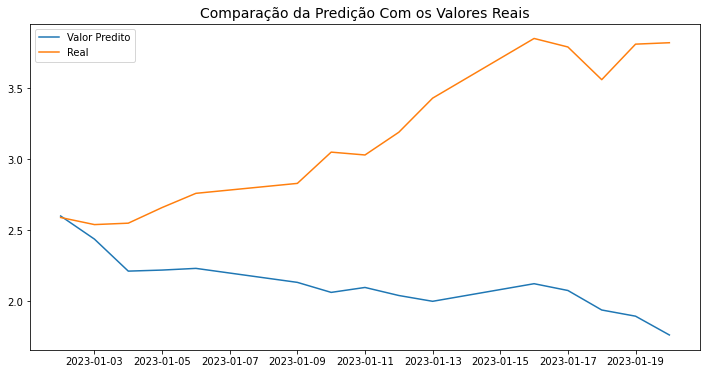

In [11]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste,label='Real')
plt.legend()

In [12]:
mae = mean_absolute_error(teste,future_forecast)
mape = mean_absolute_percentage_error(teste,future_forecast)
rmse = mean_squared_error(teste,future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 1.0430739042950259
MAPE: 0.3056638639108101
RMSE: 1.231045128205955


In [13]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [14]:
p = range(0, 5, 1)
d = 1
q = range(0, 5, 1)
P = range(0, 5, 1)
D = 1
Q = range(0, 5, 1)
s = 2
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

625


In [15]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, treino)
result_df.head()

  0%|          | 0/625 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 0, 2, 3)",1225.033855
1,"(0, 1, 2, 3)",1225.248848
2,"(1, 0, 2, 4)",1226.333514
3,"(1, 0, 3, 3)",1226.395347
4,"(0, 1, 2, 4)",1226.466170


In [21]:
best_model = SARIMAX(treino, order=(0, 1, 1), seasonal_order=(2, 1, 3, 2)).fit(dis=-1)
print(best_model.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                     Close   No. Observations:                 1239
Model:             SARIMAX(0, 1, 1)x(2, 1, [1, 2, 3], 2)   Log Likelihood                -605.495
Date:                                   Tue, 07 Feb 2023   AIC                           1224.989
Time:                                           13:59:38   BIC                           1260.827
Sample:                                                0   HQIC                          1238.469
                                                  - 1239                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0701      0.016     -4.332      0.000    

In [22]:
fc = best_model.forecast(len(teste), alpha=0.05)

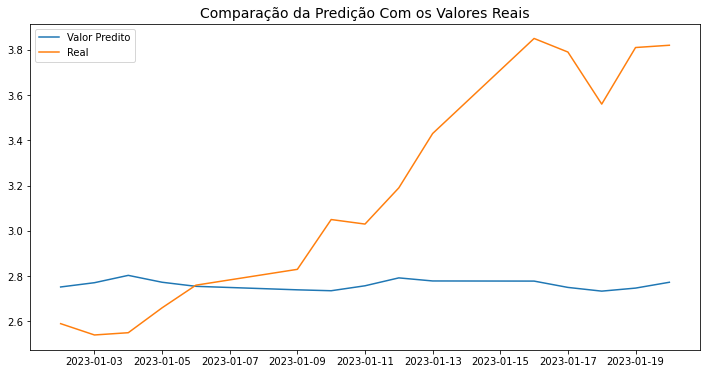

In [23]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,fc,label='Valor Predito')
plt.plot(teste.index,teste.values,label='Real')
plt.legend()

In [24]:
mae = mean_absolute_error(teste,fc)
mape = mean_absolute_percentage_error(teste,fc)
rmse = mean_squared_error(teste,fc)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 0.5026282190260241
MAPE: 0.1449905099426648
RMSE: 0.6356103428173703
